## 用决策树模型完成分类问题

In [2]:
#用于数据处理和分析的工具包
import pandas as pd
#引入用于数据预处理/特征工程的工具包
from sklearn import preprocessing
#import决策树建模包
from sklearn import tree


读取数据

In [3]:
data = pd.read_csv('./DecisionTree.csv')

In [4]:
data.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [5]:
print(data.shape)
data.info()


(32561, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       32561 non-null  object
 1   education       32561 non-null  object
 2   marital-status  32561 non-null  object
 3   occupation      32561 non-null  object
 4   relationship    32561 non-null  object
 5   race            32561 non-null  object
 6   gender          32561 non-null  object
 7   native-country  32561 non-null  object
 8   income          32561 non-null  object
dtypes: object(9)
memory usage: 2.2+ MB


In [6]:
data.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')


区分特征(属性)和目标


u'workclass'说明：https://blog.csdn.net/qijingpei/article/details/72993580

In [7]:
# u‘workclass’表明这是一个unicode编码的字符串
feature_columns = [u'workclass', u'education', u'marital-status',
                   u'occupation', u'relationship', u'race', u'gender', u'native-country']
label_column = ['income']


In [9]:
#区分特征和目标列
features = data[feature_columns]
label = data[label_column]

label.head()


,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


特征处理/特征工程

In [10]:
# get_dummies 是利用pandas实现one hot encode的方式。
features = pd.get_dummies(features)


构建模型

In [11]:
#初始化一个决策树分类器
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=4)
#用决策树分类器拟合数据

clf = clf.fit(features.values,label.values)


In [12]:
clf

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
clf.predict(features.values)

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)


可视化一下这颗决策树

In [15]:
import pydotplus
from IPython.display import display,Image



In [19]:


dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=features.columns,
                                class_names=['<=50k', '>50k'],
                                filled=True,
                                rounded=True
                                )


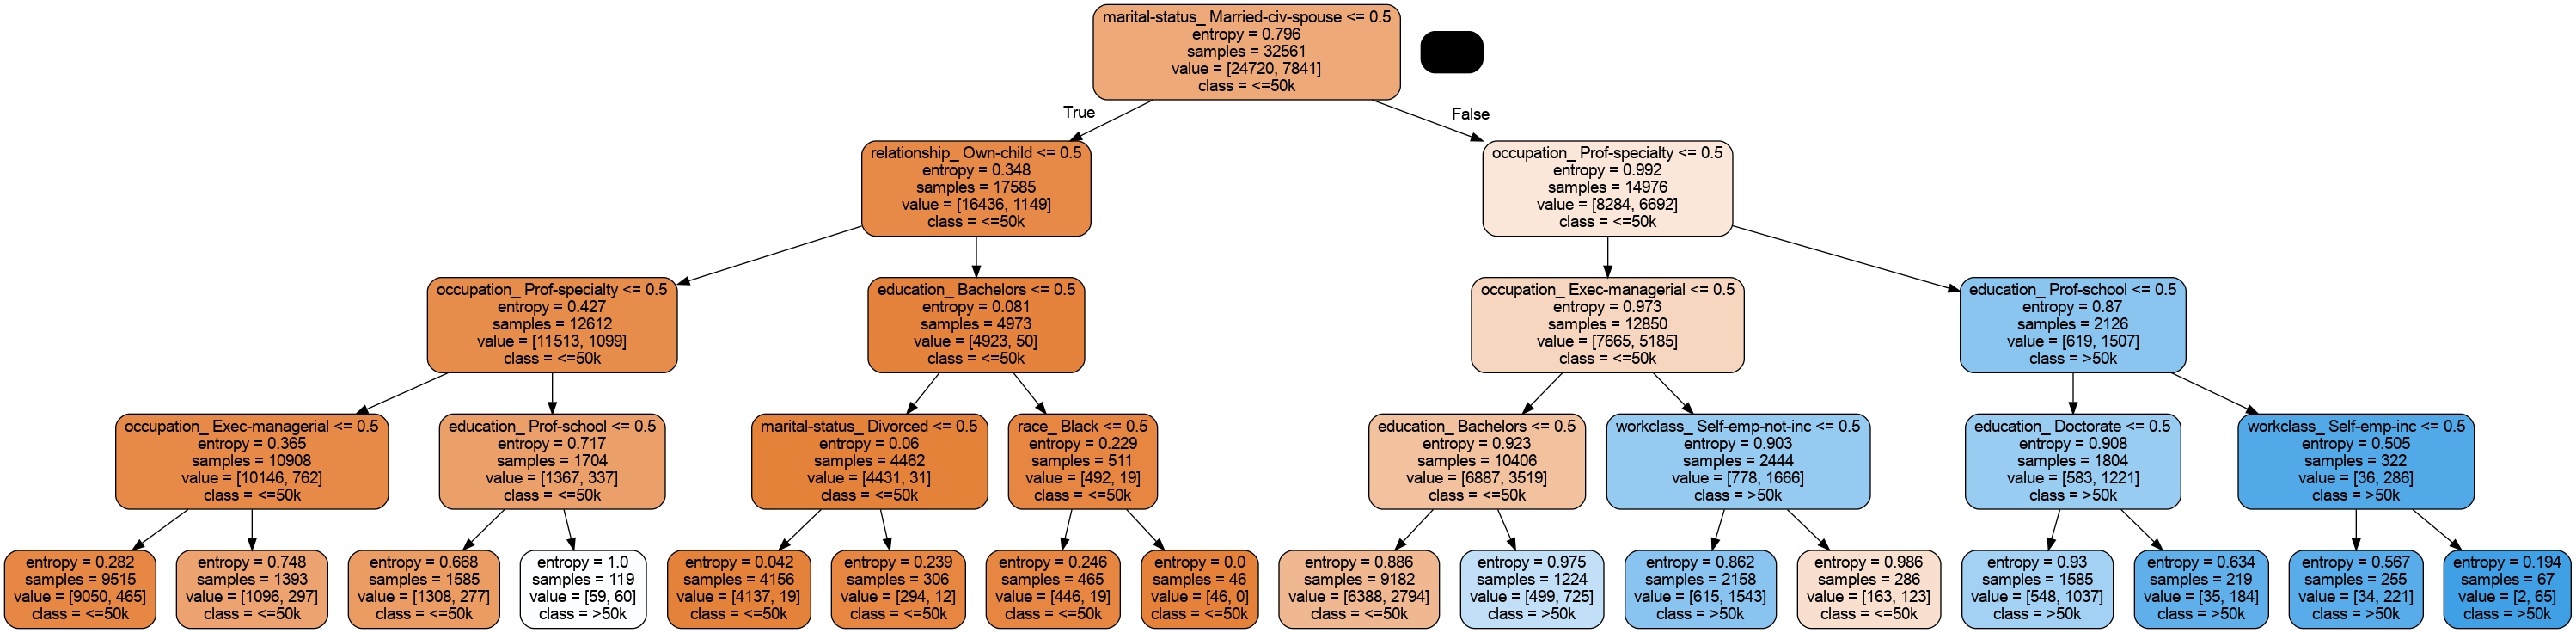

In [20]:
graph = pydotplus.graph_from_dot_data(dot_data)
display(Image(graph.create_png()))
